## Baseline Model Training – Notebook Overview

This notebook serves as a starting point for evaluating predictive performance using two simple regression models:  
- **Linear Regression** (as a statistical baseline)  
- **Random Forest Regressor** (as a basic tree-based baseline)

The goal is to establish reference scores for comparison with more advanced models (e.g., XGBoost, CatBoost) later in the pipeline.

### Dataset Splitting Strategy
The dataset is first split into **features (`X`)** and **target (`y`)**, then partitioned into:
- **Training set (80%)** – used to train the model  
- **Testing set (20%)** – held out to evaluate generalization

This split is performed using `train_test_split` from `sklearn.model_selection` with a fixed `random_state` to ensure reproducibility.

### Models Trained
1. **Linear Regression**  
   - A simple model that assumes a linear relationship between inputs and the target.
   - Useful to detect underfitting or feature quality issues.

2. **Random Forest Regressor**  
   - An ensemble of decision trees that typically performs better than linear models by capturing nonlinear patterns.
   - Provides a stronger, but still untuned, performance baseline.

### Evaluation Metrics
Both models are evaluated using:
- **Mean Absolute Error (MAE)**
- **Root Mean Squared Error (RMSE)**
- **R<sup>2</sup> Score (Coefficient of Determination)**

These metrics give an initial understanding of how well the models fit the data.  
All future models in the pipeline should **outperform these baselines** to justify their added complexity.

---


# Load the preprocesed ML file


In [1]:
import sys, os

# Add the project root to the Python path
project_root = os.path.abspath("../..")
sys.path.append(project_root)

# Imports from local modules
import pandas as pd
from utils.data_cleaner import DataCleaner
from utils.data_loader import DataLoader
from utils.constants import  ML_READY_DATA_FILE
 
# Import standard libraries
from sklearn.model_selection import train_test_split

# Load the dataset
loader = DataLoader(ML_READY_DATA_FILE)
df = loader.load_data()

df.head(10)


,bedroomCount,bathroomCount,postCode,habitableSurface,buildingConstructionYear,facedeCount,toiletCount,is_big_property,room_count,surface_per_room,...,epcScore_A++,epcScore_B,epcScore_C,epcScore_D,epcScore_E,epcScore_F,epcScore_G,hasLivingRoom,hasTerrace,price
0,2.0,1.0,1040.0,100.0,2004.0,1.0,1.0,0.0,3.0,33.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,399000.0
1,4.0,2.0,1040.0,270.0,1910.0,2.0,3.0,0.0,6.0,45.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,895000.0
2,2.0,1.0,1040.0,87.0,1970.0,2.0,1.0,0.0,3.0,29.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,465000.0
3,1.0,1.0,1040.0,71.0,1906.0,2.0,1.0,0.0,2.0,35.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,289000.0
4,2.0,1.0,1040.0,90.0,1958.0,2.0,1.0,0.0,3.0,30.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,375000.0
5,3.0,2.0,1040.0,220.0,2023.0,2.0,4.0,0.0,5.0,44.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,950000.0
6,3.0,2.0,1040.0,220.0,2023.0,2.0,4.0,0.0,5.0,44.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,950000.0
7,1.0,1.0,1040.0,93.0,1947.0,2.0,1.0,0.0,2.0,46.500000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,297000.0
8,2.0,1.0,1040.0,120.0,1932.0,2.0,1.0,0.0,3.0,40.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,435000.0
9,3.0,1.0,1040.0,119.0,1944.0,2.0,1.0,0.0,4.0,29.750000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,370000.0


# Dataset Splitting Strategy

In this step, we split the full dataset into:
- **Features (`X`)**: all columns except the target variable (`price`)
- **Target (`y`)**: the column we want to predict (here, `price`)

We use `train_test_split` from `sklearn.model_selection` to divide the data into:
- **Training set (80%)** — used to train the model
- **Testing set (20%)** — used to evaluate performance on unseen data

The `random_state=42` ensures that the split is reproducible.  
Shapes of the resulting datasets are displayed for quick verification.


In [2]:
# Define features and target
# Replace 'price' with your actual target column name if different
X = df.drop(columns=["price"])
y = df["price"]

# Split into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Show shape for verification
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (16111, 2892)
X_test shape: (4028, 2892)
y_train shape: (16111,)
y_test shape: (4028,)


### Linear Regression Model – Training & Evaluation

In this step, we train a **Linear Regression** model on the training set to establish a simple statistical baseline.

The process includes:
- **Model initialization and training** using `LinearRegression()` from scikit-learn.
- **Prediction** on the test set to evaluate generalization performance.
- **Evaluation** using:
  - Mean Absolute Error (MAE)
  - Root Mean Squared Error (RMSE)
  - R-squared score (R<sup>2</sup>)

This baseline helps determine whether future machine learning models (e.g., Random Forest, XGBoost) provide significant improvements.


In [3]:
import sys, os
project_root = os.path.abspath("../..")
sys.path.append(project_root)

import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

from utils.data_loader import DataLoader
from utils.constants import ML_READY_DATA_FILE, ML_READY_DIR
from utils.train_test_metrics_logger import TrainTestMetricsLogger

# === Load dataset ===
loader = DataLoader(ML_READY_DATA_FILE)
df = loader.load_data()

# === Separate features and target ===
X = df.drop(columns=["price"])
y = df["price"]

# === Remove low variance features ===
selector = VarianceThreshold(threshold=0.01)
X_reduced_array = selector.fit_transform(X)
selected_columns = X.columns[selector.get_support()]
X_reduced = pd.DataFrame(X_reduced_array, columns=selected_columns)

# === Prepare model and CV ===
lr_model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold CV

# === Define scorers for cross_val_score ===
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# === Cross-validation scores (negative because scikit-learn convention) ===
neg_mae_scores = cross_val_score(lr_model, X_reduced, y, cv=kf, scoring=mae_scorer)
neg_rmse_scores = cross_val_score(lr_model, X_reduced, y, cv=kf, scoring=rmse_scorer)
r2_scores = cross_val_score(lr_model, X_reduced, y, cv=kf, scoring=r2_scorer)

# === Cross-validated predictions to compute train scores (optional) ===
y_pred_cv = cross_val_predict(lr_model, X_reduced, y, cv=kf)

# === Calculate train metrics (on full data, as estimate) ===
mae_train = mean_absolute_error(y, y_pred_cv)
rmse_train = np.sqrt(mean_squared_error(y, y_pred_cv))
r2_train = r2_score(y, y_pred_cv)

# === Calculate mean test metrics from CV ===
mae_test = -np.mean(neg_mae_scores)  # negate back
rmse_test = -np.mean(neg_rmse_scores)
r2_test = np.mean(r2_scores)

# === Log metrics ===
logger = TrainTestMetricsLogger()
logger.log(
    model_name="Linear Regression (All Features) CV 5-Fold",
    experiment_name=f"cv5fold_{datetime.now().strftime('%Y%m%d_%H%M')}_linear_regression",
    mae_train=mae_train,
    rmse_train=rmse_train,
    r2_train=r2_train,
    mae_test=mae_test,
    rmse_test=rmse_test,
    r2_test=r2_test,
    data_file=ML_READY_DATA_FILE,
    dir_choice=ML_READY_DIR  
)

# === Display summary table ===
logger.display_table(n_rows=10)


Rank,Best,timestamp,model,mae_train,rmse_train,r2_train,mae_test,rmse_test,r2_test,mae_gap,interpretation,ranking_score
1,V,2025-07-01 11:51:03,Linear Regression (All Features) CV 5-Fold,84.9 k€,119.9 k€,0.670367,84.9 k€,119.9 k€,0.670350,0.0 k€,unstable,-204837.913326


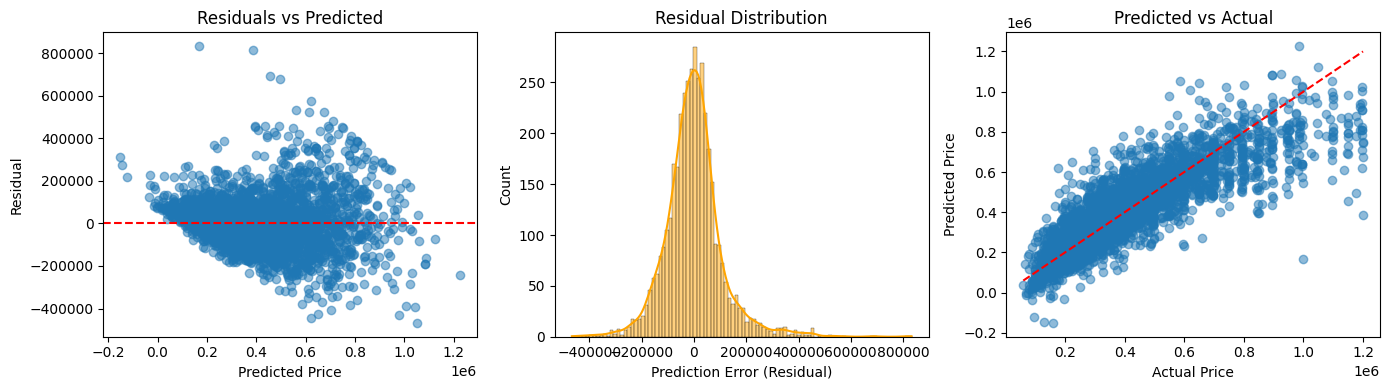

C:\Users\Neo\AppData\Local\Temp\ipykernel_17064\644388106.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_range", y="residuals", data=df_viz, palette="muted")


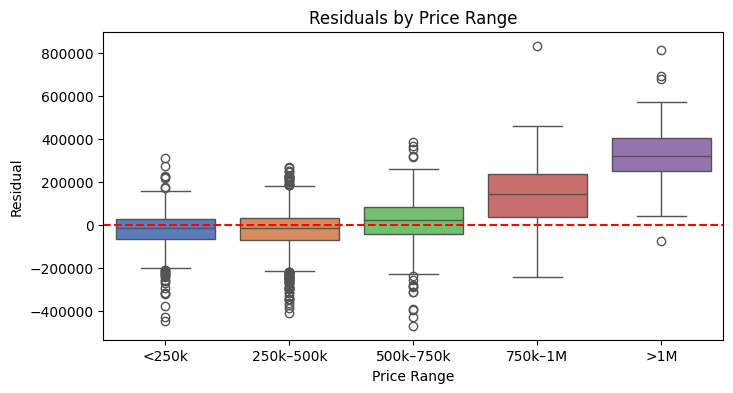

In [ ]:
# === Step 3: Train Linear Regression model ===
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# === Step 4: Predict on train and test sets ===
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# === Step 5: Compute train and test metrics ===
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# === Step 6: Log metrics with your custom logger ===
logger = TrainTestMetricsLogger()
logger.log(
    model_name="Linear Regression (All Features)",
    experiment_name=f"run_{datetime.now().strftime('%Y%m%d_%H%M')}_all_features",
    mae_train=mae_train,
    rmse_train=rmse_train,
    r2_train=r2_train,
    mae_test=mae_test,
    rmse_test=rmse_test,
    r2_test=r2_test,
    data_file=ML_READY_DATA_FILE,  
      
)

# Should yield a real series of positive and negative residuals
residuals = y_test - y_pred_test
import pandas as pd
from utils.constants import PRICE_BINS, PRICE_BIN_LABELS

df_viz = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred_test,
    "residuals": y_test - y_pred_test,
})
df_viz["price_range"] = pd.cut(df_viz["y_true"], bins=PRICE_BINS, labels=PRICE_BIN_LABELS)


# === Step 7: Display summary table of all runs (ranked by score) ===
logger.display_table(n_rows=10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.scatter(df_viz["y_pred"], df_viz["residuals"], alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted")

plt.subplot(1,3,2)
sns.histplot(df_viz["residuals"], kde=True, color="orange")
plt.xlabel("Prediction Error (Residual)")
plt.title("Residual Distribution")

plt.subplot(1,3,3)
plt.scatter(df_viz["y_true"], df_viz["y_pred"], alpha=0.5)
plt.plot([df_viz["y_true"].min(), df_viz["y_true"].max()], 
         [df_viz["y_true"].min(), df_viz["y_true"].max()], 
         color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual")

plt.tight_layout()
plt.show()

# Residuals by price range
plt.figure(figsize=(8,4))
sns.boxplot(x="price_range", y="residuals", data=df_viz, palette="muted")
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Price Range")
plt.ylabel("Residual")
plt.title("Residuals by Price Range")
plt.show()

In [5]:
import pandas as pd
from utils.constants import PRICE_BINS, PRICE_BIN_LABELS

# Add price bins to y_test
y_test_bins = pd.cut(y_test, bins=PRICE_BINS, labels=PRICE_BIN_LABELS)
df_eval = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred_test,
    "bin": y_test_bins
})

# Compute MAE, RMSE, R2 per price bin
for label in PRICE_BIN_LABELS:
    bin_df = df_eval[df_eval["bin"] == label]
    if not bin_df.empty:
        mae_bin = mean_absolute_error(bin_df["y_true"], bin_df["y_pred"])
        rmse_bin = np.sqrt(mean_squared_error(bin_df["y_true"], bin_df["y_pred"]))
        r2_bin = r2_score(bin_df["y_true"], bin_df["y_pred"])
        print(f"Bin {label}: MAE={mae_bin:.1f}, RMSE={rmse_bin:.1f}, R2={r2_bin:.3f}")


Bin <250k: MAE=59054.1, RMSE=80222.2, R2=-2.603
Bin 250k–500k: MAE=65840.7, RMSE=88558.8, R2=-0.520
Bin 500k–750k: MAE=85809.2, RMSE=112352.2, R2=-1.731
Bin 750k–1M: MAE=167816.3, RMSE=207676.9, R2=-7.202
Bin >1M: MAE=326295.0, RMSE=361237.3, R2=-43.170


In [6]:
logger.display_table()

Rank,Best,timestamp,model,mae_train,rmse_train,r2_train,mae_test,rmse_test,r2_test,mae_gap,interpretation,ranking_score
1,V,2025-07-01 11:51:15,Linear Regression (All Features),63.7 k€,94.0 k€,0.797768,76.9 k€,109.9 k€,0.723019,0.0 k€,overfitting,-186832.774354
2,,2025-07-01 11:51:03,Linear Regression (All Features) CV 5-Fold,84.9 k€,119.9 k€,0.670367,84.9 k€,119.9 k€,0.670350,0.0 k€,unstable,-204837.913326


In [7]:
import sys, os
project_root = os.path.abspath("../..")
sys.path.append(project_root)

import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from utils.data_loader import DataLoader
from utils.constants import ML_READY_DATA_FILE
from utils.train_test_metrics_logger import TrainTestMetricsLogger

# === Load dataset ===
loader = DataLoader(ML_READY_DATA_FILE)
df = loader.load_data()

# === Separate features and target ===
X = df.drop(columns=["price"])
y = df["price"]

# === Remove low variance features ===
selector = VarianceThreshold(threshold=0.01)
X_reduced_array = selector.fit_transform(X)
selected_cols = X.columns[selector.get_support()]
X_reduced = pd.DataFrame(X_reduced_array, columns=selected_cols)

# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# === Train Random Forest ===
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# === Predict on train and test sets ===
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# === Calculate metrics ===
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# === Log metrics ===
logger = TrainTestMetricsLogger()
logger.log(
    model_name="Random Forest (All Features)",
    experiment_name=f"run_{datetime.now().strftime('%Y%m%d_%H%M')}_random_forest",
    mae_train=mae_train,
    rmse_train=rmse_train,
    r2_train=r2_train,
    mae_test=mae_test,
    rmse_test=rmse_test,
    r2_test=r2_test,
    data_file=ML_READY_DATA_FILE,
    dir_choice="ml_ready"
)

# === Display summary table ===
logger.display_table(n_rows=10)


Rank,Best,timestamp,model,mae_train,rmse_train,r2_train,mae_test,rmse_test,r2_test,mae_gap,interpretation,ranking_score
1,V,2025-07-01 11:51:23,Random Forest (All Features),26.2 k€,39.1 k€,0.965067,68.3 k€,101.4 k€,0.764228,0.0 k€,overfitting,-169750.741399
2,,2025-07-01 11:51:15,Linear Regression (All Features),63.7 k€,94.0 k€,0.797768,76.9 k€,109.9 k€,0.723019,0.0 k€,overfitting,-186832.774354
3,,2025-07-01 11:51:03,Linear Regression (All Features) CV 5-Fold,84.9 k€,119.9 k€,0.670367,84.9 k€,119.9 k€,0.670350,0.0 k€,unstable,-204837.913326


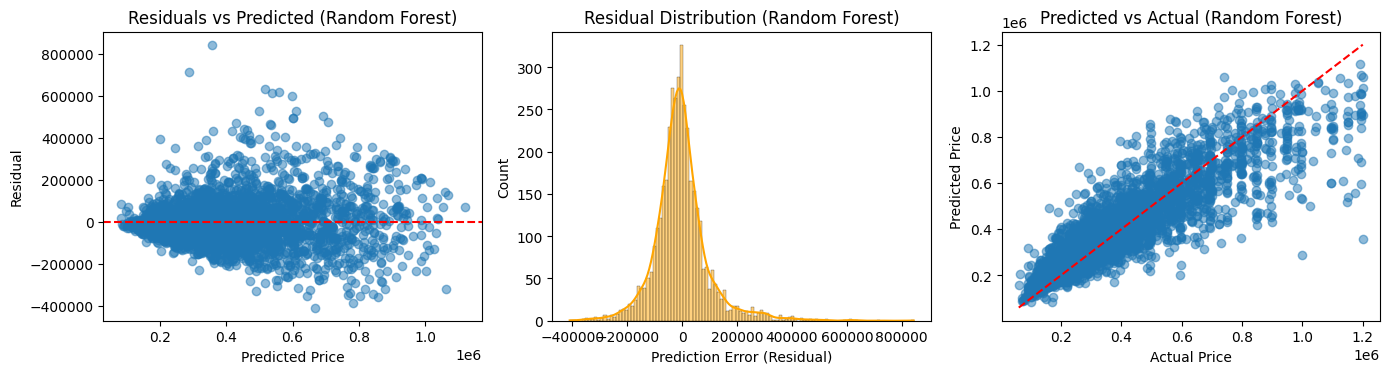

C:\Users\Neo\AppData\Local\Temp\ipykernel_17064\1115661287.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_range", y="residuals", data=df_viz, palette="muted")


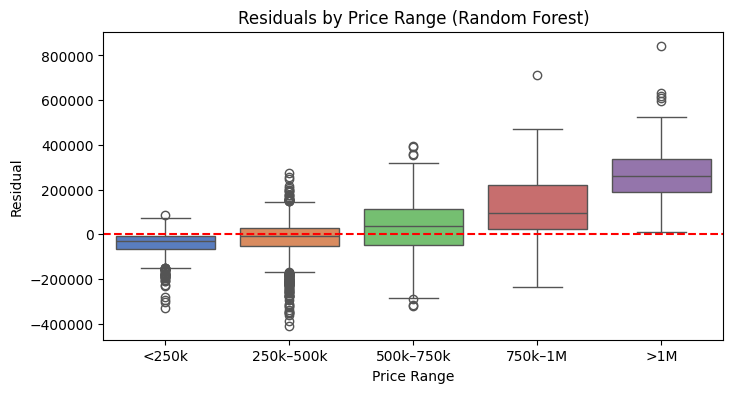

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.constants import PRICE_BINS, PRICE_BIN_LABELS

# Compute residuals (y_test - y_pred_test)
residuals = y_test - y_pred_test

# Create a DataFrame for visualization
df_viz = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred_test,
    "residuals": residuals,
})

# Add price ranges for segmented analysis
df_viz["price_range"] = pd.cut(df_viz["y_true"], bins=PRICE_BINS, labels=PRICE_BIN_LABELS)

# Display metrics already logged elsewhere
logger.display_table(n_rows=10)

# Plot diagrams
plt.figure(figsize=(14, 4))

# 1. Residuals vs Predicted Prices
plt.subplot(1, 3, 1)
plt.scatter(df_viz["y_pred"], df_viz["residuals"], alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted (Random Forest)")

# 2. Residual distribution
plt.subplot(1, 3, 2)
sns.histplot(df_viz["residuals"], kde=True, color="orange")
plt.xlabel("Prediction Error (Residual)")
plt.title("Residual Distribution (Random Forest)")

# 3. Predicted vs Actual Prices
plt.subplot(1, 3, 3)
plt.scatter(df_viz["y_true"], df_viz["y_pred"], alpha=0.5)
plt.plot([df_viz["y_true"].min(), df_viz["y_true"].max()],
         [df_viz["y_true"].min(), df_viz["y_true"].max()],
         color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual (Random Forest)")

plt.tight_layout()
plt.show()

# 4. Residuals by price range (boxplot)
plt.figure(figsize=(8, 4))
sns.boxplot(x="price_range", y="residuals", data=df_viz, palette="muted")
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Price Range")
plt.ylabel("Residual")
plt.title("Residuals by Price Range (Random Forest)")
plt.show()


In [9]:
import sys, os
project_root = os.path.abspath("../..")
sys.path.append(project_root)

import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from utils.data_loader import DataLoader
from utils.constants import ML_READY_DATA_FILE, ML_READY_DIR
from utils.train_test_metrics_logger import TrainTestMetricsLogger

# === Load dataset ===
loader = DataLoader(ML_READY_DATA_FILE)
df = loader.load_data()

# === Separate features and target ===
X = df.drop(columns=["price"])
y = df["price"]

# === Optional: Remove low variance features (recommandé si trop de features) ===
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
X_reduced_array = selector.fit_transform(X)
selected_columns = X.columns[selector.get_support()]
X_reduced = pd.DataFrame(X_reduced_array, columns=selected_columns)

# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# === Create and train polynomial regression model degree 2 ===
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

# === Predict ===
y_pred_train = poly_model.predict(X_train)
y_pred_test = poly_model.predict(X_test)

# === Calculate metrics ===
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# === Log metrics ===
logger = TrainTestMetricsLogger()
logger.log(
    model_name=f"Polynomial Regression (Degree {degree})",
    experiment_name=f"run_{datetime.now().strftime('%Y%m%d_%H%M')}_poly_deg{degree}",
    mae_train=mae_train,
    rmse_train=rmse_train,
    r2_train=r2_train,
    mae_test=mae_test,
    rmse_test=rmse_test,
    r2_test=r2_test,
    data_file=ML_READY_DATA_FILE,
    dir_choice=ML_READY_DIR
)

# === Display summary table ===
logger.display_table(n_rows=10)


Rank,Best,timestamp,model,mae_train,rmse_train,r2_train,mae_test,rmse_test,r2_test,mae_gap,interpretation,ranking_score
1,V,2025-07-01 11:51:23,Random Forest (All Features),26.2 k€,39.1 k€,0.965067,68.3 k€,101.4 k€,0.764228,0.0 k€,overfitting,-169750.741399
2,,2025-07-01 11:51:15,Linear Regression (All Features),63.7 k€,94.0 k€,0.797768,76.9 k€,109.9 k€,0.723019,0.0 k€,overfitting,-186832.774354
3,,2025-07-01 11:51:38,Polynomial Regression (Degree 2),66.0 k€,94.4 k€,0.795941,79.1 k€,116.2 k€,0.690439,0.0 k€,underfitting,-195341.498785
4,,2025-07-01 11:51:03,Linear Regression (All Features) CV 5-Fold,84.9 k€,119.9 k€,0.670367,84.9 k€,119.9 k€,0.670350,0.0 k€,unstable,-204837.913326


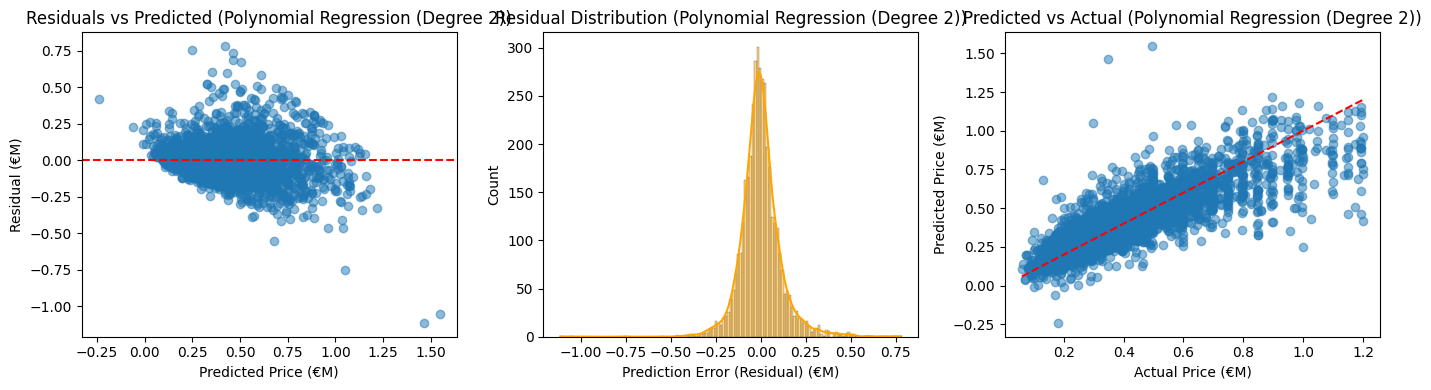

C:\Users\Neo\AppData\Local\Temp\ipykernel_17064\1578335532.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_range", y=df_viz["residuals"] / 1_000_000, data=df_viz, palette="muted")


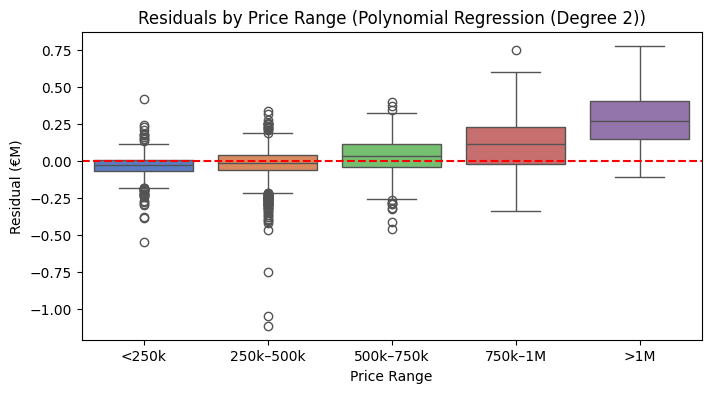

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.constants import PRICE_BINS, PRICE_BIN_LABELS

model_display_name = f"Polynomial Regression (Degree {degree})"

# Compute residuals (y_test - y_pred_test)
residuals = y_test - y_pred_test

# Create a DataFrame for visualization
df_viz = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred_test,
    "residuals": residuals,
})

# Add price ranges for segmented analysis
df_viz["price_range"] = pd.cut(df_viz["y_true"], bins=PRICE_BINS, labels=PRICE_BIN_LABELS)

# Display metrics already logged elsewhere
logger.display_table(n_rows=10)

# Visualization plots
plt.figure(figsize=(14, 4))

# 1. Residuals vs Predicted Prices (in €M)
plt.subplot(1, 3, 1)
plt.scatter(df_viz["y_pred"] / 1_000_000, df_viz["residuals"] / 1_000_000, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Price (€M)")
plt.ylabel("Residual (€M)")
plt.title(f"Residuals vs Predicted ({model_display_name})")

# 2. Residual distribution (in €M)
plt.subplot(1, 3, 2)
sns.histplot(df_viz["residuals"] / 1_000_000, kde=True, color="orange")
plt.xlabel("Prediction Error (Residual) (€M)")
plt.title(f"Residual Distribution ({model_display_name})")

# 3. Predicted vs Actual Prices (in €M)
plt.subplot(1, 3, 3)
plt.scatter(df_viz["y_true"] / 1_000_0_]()_
